In [92]:
import re
import os
import sys
import csv
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib_venn import venn2
from prettytable import PrettyTable
from matplotlib import pyplot as plt
from Bio import SeqIO, pairwise2, AlignIO
from collections import Counter, namedtuple
from Bio.Align import AlignInfo, MultipleSeqAlignment
import importlib
importlib.reload(sys.modules['MultipleCutter'])
from Sequence import Sequence
from MultipleCutter import MultipleCutter
from Util.SeqUtil import seqInfo, parseFasta, parseSeqByCutter
from DataStructure import refSeqSimilarityInfo
from Evaluation.DfamEvaluation import DfamEvaluation
from SharedInfo import currDatasetName, cutterA, cutterB, colorA, colorB
from Util.AnalysisUtil import listToSortedCounter, getStatisticData, mostCommonTable
from Util.PlotUtil import basicPlot, twoLabelBasicPlot, lengthScatterDistributionPlot

In [2]:
seqA = Sequence(cutterA)
parseFastaA = seqA.parseFasta()
fragmentLenListA, fragmentSeqListA = seqA.parseSeqByCutter()
repeatInfoListA = seqA.findRepeatSeqs(lengthLimit=False)
filterRepeatInfoA = seqA.filterRepeatInfo()
repeatPositionListA = seqA.getRepeatPositionList(filter=True)
seqAState = seqA.seqStateGenerator()

...start parsing dm6/chrX_sequence.fasta fasta file ...
...cost0.14623188972473145 sec to parse fasta file ...
...start parse seq by cutter: GATC
...cost 0.8530738353729248 sec to cut sequence
... start finding repeat seq ...
...cost0.06888866424560547 sec to finding repeat seq  ...


In [3]:
seqB = Sequence(cutterB)
parseFastaB = seqB.parseFasta()
fragmentLenListB, fragmentSeqListB = seqB.parseSeqByCutter()
repeatInfoListB = seqB.findRepeatSeqs(lengthLimit=False)
filterRepeatInfoB = seqB.filterRepeatInfo()
repeatPositionListB = seqB.getRepeatPositionList(filter=True)
seqBState = seqB.seqStateGenerator()

...start parsing dm6/chrX_sequence.fasta fasta file ...
...cost0.11940288543701172 sec to parse fasta file ...
...start parse seq by cutter: AAGCTT
...cost 0.6463310718536377 sec to cut sequence
... start finding repeat seq ...
...cost0.005948066711425781 sec to finding repeat seq  ...


In [4]:
seqInfo(currDatasetName, parseFastaA)

dm6/chrX_sequence dataset
 number of sequence:1
 total length:23542271



In [5]:
# repeatPositionList = repeatPositionListA + repeatPositionListB

In [6]:
# print(f'Check cutter A, B: \n {len(repeatPositionList)} = {len(repeatPositionListA)} + {len(repeatPositionListB)}')

In [7]:
# repeatPositionList[0]

In [8]:
# df = pd.DataFrame(columns=['startIdx', 'endIdx', 'length'])
# for i in repeatPositionList:
#     df = df.append({'startIdx': i.startIdx, 'endIdx': i.endIdx, 'length': i.endIdx-i.startIdx}, ignore_index=True)
# df.to_csv(f'../outputFile/PartialSeqInfo/NonFilter_Position.csv')

In [93]:
# repeat position
multipleCutter = MultipleCutter(sequence=parseFastaA[0], seqStateList = [seqAState, seqBState])
seqStateSum = multipleCutter.getSeqStateSum()
unMatchState, unionState, intersectionState = multipleCutter.getSeqStateInfo()
stateName="intersection"
matchStateIdxList = multipleCutter.getSpecificStateIdxList(stateName)
matchStateRepeatInfoList = multipleCutter.getSpecificStatePositionList()
totalRepeat = multipleCutter.cutRepeatSeqToFragment()

chr: 23542271
unMatch: 22650092, union:892179, intersection:120803
...start parse seq by cutter: GATC
...cost 0.0002932548522949219 sec to cut sequence


In [94]:
multipleCutter.fragmentGroupbyLen()

In [12]:
# # [ Output GroupByData File ]

# matchDfGroupByLen = df.groupby(by=["length"], sort=True)
# tem = df.groupby(by=["length"]).agg({"length": "sum"})

# original_stdout = sys.stdout
# with open(f'../outputFile/SeqState/groupByLenData_{stateName}.txt', 'w') as f:
#     sys.stdout = f
#     for key, row in tem.iterrows():
#         print(f"{key}:")
#         for i in matchDfGroupByLen.get_group(key).index:
#             print(f"({ df.iloc[i]['startIdx']}, {df.iloc[i]['endIdx']})\n{ df.iloc[i]['seq']}")
#         print("\n")
#     sys.stdout = original_stdout

In [13]:
# [ Output SeqState File ]
# multipleCutter.generateSeqStateSumFile(filePath = '../outputFile/SeqState/seqStateSum.txt')

In [14]:
# intersection , union
# unionMatchStateIdxList = multipleCutter.getSpecificStateIdxList("union")
# len(matchStateRepeatInfoList), len(unionMatchStateIdxList)

In [15]:
# df = pd.DataFrame(columns=['startIdx', 'endIdx', 'length'])
# for i in matchStateRepeatInfoList:
#     df = df.append({'startIdx': i.startIdx, 'endIdx': i.endIdx, 'length': i.endIdx-i.startIdx}, ignore_index=True)
# df.to_csv(f'../outputFile/PartialSeqInfo/{stateName}.csv')

In [16]:
# df = pd.DataFrame(columns=['startIdx', 'endIdx', 'length'])
# for i in matchStateRepeatInfoList:
#     df = df.append({'startIdx': i.startIdx, 'endIdx': i.endIdx, 'length': i.endIdx-i.startIdx}, ignore_index=True)
# df['length'] = df['length'].astype('int32')
# df['length'].describe()
# df.to_csv(f'../outputFile/txtFile/{stateName}AndNonFilter_Position.csv')

In [17]:
# repeatPositionList = matchStateRepeatInfoList

In [18]:
# [ Mltiplecutter, Intersection or Union ]
dfam = DfamEvaluation(matchStateRepeatInfoList, hitFileName='cheX_BS2_dm6_dfam.nrph.hits')
repeatPositionLookupDic = dfam.positionBucketClassifier()
dfamPositionList = dfam.getDfamPositionList()

# from Dfam , check repeat
DRrepeatMatchList, DRmatchedFamilyAccList, DRmatchedFamilyNameList = dfam.checkDfamMatchWithRepeat()

# from repeat , check Dfam
RDrepeatMatchList, RDmatchedFamilyAccList, RDmatchedFamilyNameList = dfam.checkRepeatMatchWithDfam()

# dfam.familyMatchRatio(DRmatchedFamilyAccList)
dfam.matchRatio(DRrepeatMatchList)
# unMatchDf = dfam.getUnmatchInfo(DRrepeatMatchList)

matchCount:7	dfamCount:31	Ratio:0.22580645161290322


0.22580645161290322

In [19]:
(DRrepeatMatchList)

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [20]:
def getSequenceLengthAnalsis(inputLengthList, num=10):
    """
    1. count of common length 
    2. statistic info
    3. distribution plot
    """
    mostCommonTable(Counter(inputLengthList).most_common(num), num)
    getStatisticData(inputLengthList)
    sortedCounterList = listToSortedCounter(inputLengthList)
    basicPlot(sortedCounterList)

In [21]:
# totalDfam = DfamEvaluation(repeatPositionList, hitFileName="chrX_dm6_dfam.nrph.hits")
# totalRepeatPositionLookupDic = totalDfam.positionBucketClassifier()
# totalDfamPositionList = totalDfam.getDfamPositionList()
# unionAndFilter_Position = pd.read_csv('../outputFile/txtFile/unionAndFilter_Position.csv')
# intersectionAndFilter_Position = pd.read_csv('../outputFile/txtFile/intersectionAndFilter_Position.csv')
# Filter_Position = pd.read_csv('../outputFile/txtFile/Filter_Position.csv')
# NonFilter_Position = pd.read_csv('../outputFile/txtFile/NonFilter_Position.csv')

# unionAndFilter_Counter = listToSortedCounter((unionAndFilter_Position['length']))
# intersectionAndFilter_Counter = listToSortedCounter((intersectionAndFilter_Position['length']))

In [22]:
# df = pd.DataFrame(columns=["x", "y", "type"], dtype=float)
# for row in unionAndFilter_Counter:
#     df = df.append({"x": row[0], "y": row[1], "type": "unionAndFilter"}, ignore_index=True)
# for row in intersectionAndFilter_Counter:
#     df = df.append({"x": row[0], "y": row[1], "type": "intersectionAndFilter"}, ignore_index=True)

# df.fillna(np.nan, inplace=True)
# fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
# sns.set_style("whitegrid")
# sns.lineplot(data=df, x="x", y="y", hue="type", palette="Set1")
# ax.set_xlabel("Length", size=15)
# ax.set_ylabel("Count", size=15)
# ax.set_xlim(0, 1500)

+---------+-------+
| FragLen | Count |
+---------+-------+
|   2330  |   5   |
|    60   |   2   |
|    66   |   2   |
|   2331  |   2   |
|    59   |   1   |
|    85   |   1   |
|    49   |   1   |
|   227   |   1   |
|   334   |   1   |
|    82   |   1   |
+---------+-------+
count      31.000000
mean      705.935484
std       925.684861
min        49.000000
25%        83.500000
50%       227.000000
75%       981.500000
max      2331.000000
dtype: float64


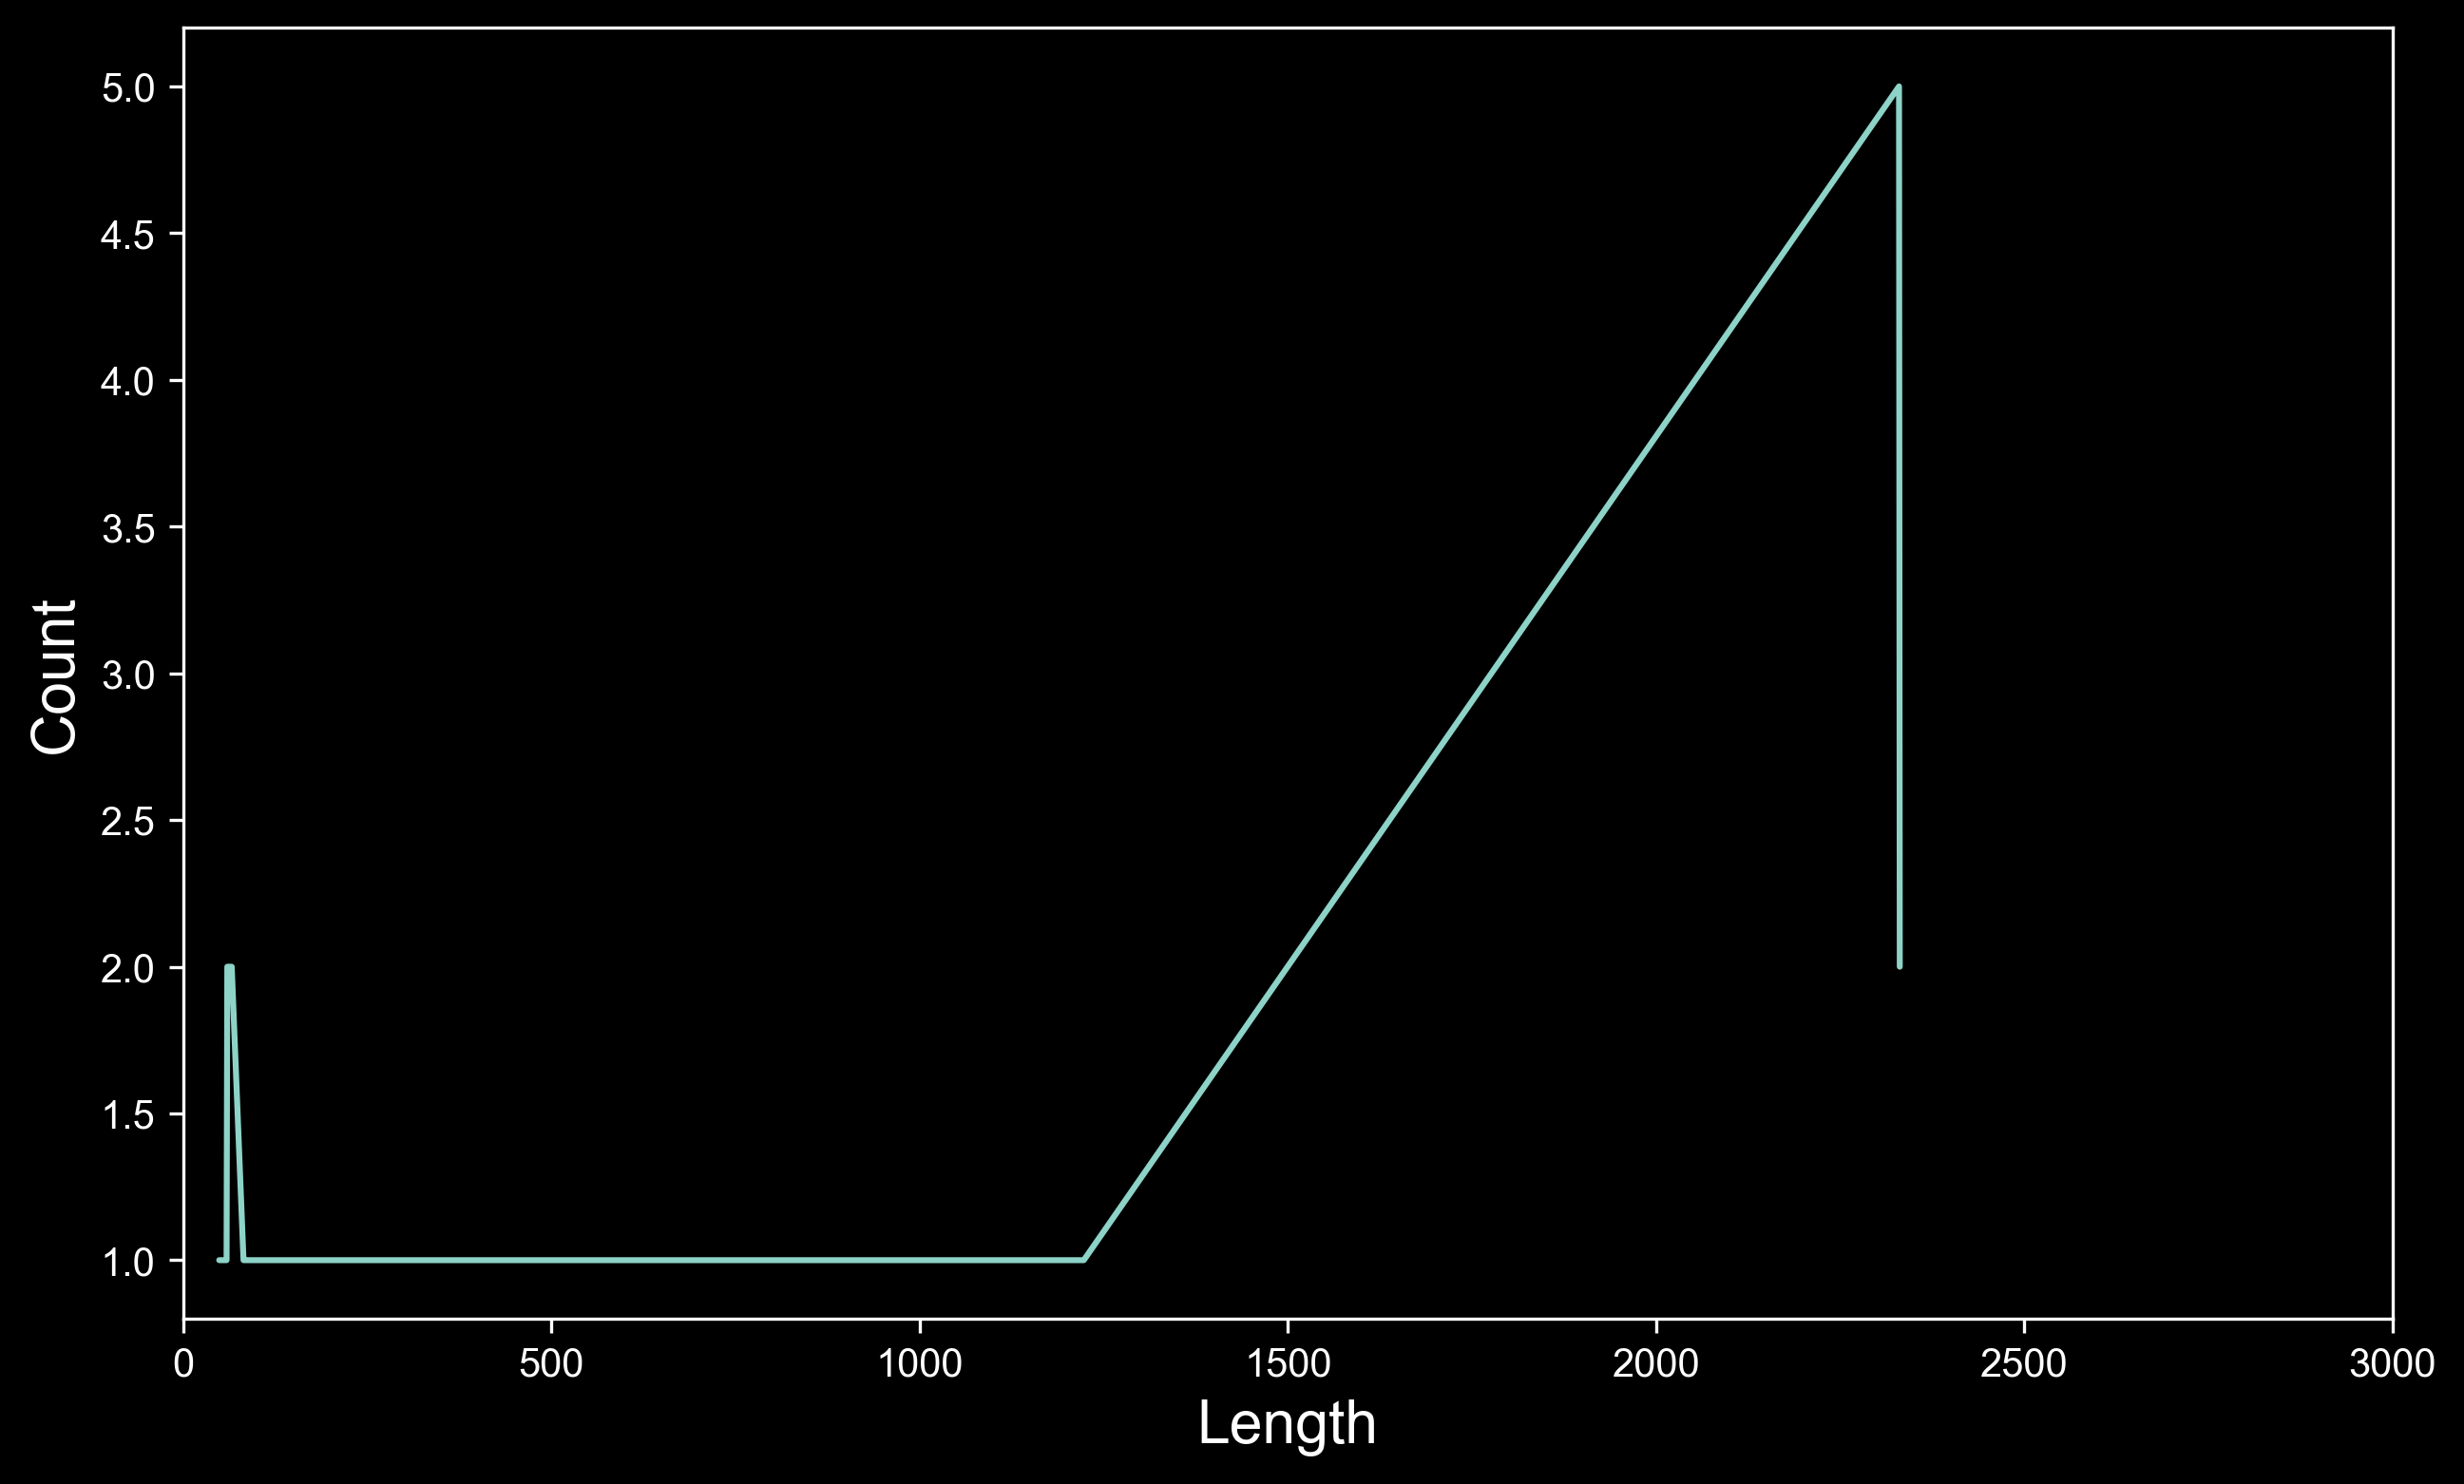

In [23]:
# Dfam ref sequence 
dfamSeqLenList = [ i.endIdx - i.startIdx for i in dfamPositionList ]
getSequenceLengthAnalsis(dfamSeqLenList)

In [24]:
BS2df = pd.DataFrame(columns=['startIdx','endIdx','length','seq'])
for i in dfamPositionList:
    BS2df = BS2df.append({'startIdx': i.startIdx,'endIdx': i.endIdx ,'length':i.endIdx-i.startIdx,'seq': parseFastaA[0][i.startIdx: i.endIdx]}, ignore_index=True)
BS2df.to_csv('./Evaluation/Source/chrX_BS2_ref.csv', index=False)

In [25]:
# Repeat sequence
# repeatFragmentLenList = [ i.endIdx - i.startIdx for i in repeatPositionList ]
# getSequenceLengthAnalsis(repeatFragmentLenList)

In [26]:
alignments = pairwise2.align.globalxx("ACG", "ACCGT")
alignments[0].score / len("ACG")

1.0

In [27]:
def consensusSeqSimilarity(consensusSeq, seqDf):
    seqSimilarityList = []
    for targetSeq in seqDf:
        alignments = pairwise2.align.globalxx(targetSeq, consensusSeq)
        targetLength = len(targetSeq)
        similarityPercentage = round(alignments[0].score / targetLength, 2)
        seqSimilarityList.append(similarityPercentage)
    return seqSimilarityList

# repeatMatchIdxList = []
# for idx, value in enumerate(RDrepeatMatchList):
#     if value == True:
#         repeatMatchIdxList.append(idx)
# repeatBasePositionList = [repeatPositionList[i] for i in repeatMatchIdxList]
# repeatSeqDf = pd.DataFrame(columns=['startIdx','endIdx', 'length', 'seq'])
# for i in repeatBasePositionList:
#     repeatSeqDf = repeatSeqDf.append({'startIdx':i.startIdx ,'endIdx': i.endIdx, 'length': (i.endIdx- i.startIdx), 'seq': str(parseFastaA[0][i.startIdx:i.endIdx])}, ignore_index=True)
conParseFasta = parseFasta(
    "DF0001549_BS2",
    "./Evaluation/Source/DF0001549_BS2.fa",
    "*",
    matchMode=False,
)
consensusSeq = conParseFasta[0].upper()
repeatDf = pd.read_csv('./Evaluation/Source/chrX_BS2_ref.csv')
seqDf = repeatDf["seq"]
seqSimilarityList = consensusSeqSimilarity(consensusSeq, seqDf)
pd.Series(seqSimilarityList).describe()

...start parsing DF0001549_BS2 fasta file ...
...cost0.0006389617919921875 sec to parse fasta file ...


count    31.000000
mean      0.970645
std       0.055253
min       0.870000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
dtype: float64

In [28]:
a = "AAGCTTCTATTATTGGGCTGTTGCTGTTGCTTCTGTTGTTGGTGCGTCAAGCTCAGTGGTTGCTTATGGTGAACGAACCCTGTAACCACATCTGCATACGATATACCTCCTCTAGAAGAGGGGATCTCCCTACCTCCAGATAAGCCCTGTGTAGTTGGTCGCTCCTTTACCTCGGTTCTTCCGGCCACTCCACTTCTGGGTCTGGATCGCTGCATGAACGCTTGTAGTTTGCTGCAACCTTAATAATTTGCAGGATGCTGTCCACCACAGTTGTAGCAAGTGCACAGCTCGATGCGAGGCCTAGTACAGTCCTTGGCTGGGTGTTCGCCGGCACGTTTCACACAAATGTGGGCCTTACGGCAGTATTTGGCTGTGTGGCCAAACTGCTGACAACGATGGCATTGAACAATATCGTTACGCTTGCGGAGAGGCTCAATAAGTACTCTCATATGGCATAGTTACTGTCAGGATCTCCTTATTGTTTGTCGCAGCAGCTTTTGAGGTACCTGGTTCGTTTCGCCTTAGCGGTGTATGTATGTCGAGCACCTTGTGCCCGATATTTTCCAGCTCTTCCTTGATCTGGTAATGTAGCGTACAGTGGTGCAGGCCTTTCACGCATACCCTGTAAGGAATGTCTTCTTTTAGCTGGTAACAGTGGAACTCATATTCTTCGTTCTCGACTTCACTATGATGCGAAATGTGTCAGGACACCGCCCATTGACGCCCTAGCCTCAACCTCAAACTTTTCTATGTCCACTATATTTTCGATGCTCTGCATCATCGTCGTCTACTCCCTCCATTACTATAGGAGGTGGTTTGGACTGCGCCTTGTTGAGTGAGCTAGTGGTACCAGCGGAGGCTGCATCCCGCTTAGCGGCAGCAATAGCAGGTTGGTGACTGGTACTGGGCTGGTCATACAGATCGCCGATATCATTGCCTACTTGTTTGTCGACTGAGAGATGCGCAAGTAAACCAAAAAGGTTAGAGTTGCCGCCATATCTAGGTTCTGTAGACGATGGGTTTTCCCCTTGTTTGCCGATATTTGATTTAGATTTTTCCTGTCAGTCTCCGAAAAAGCACGAGACTTTCGCTTTATTTGAAAGCGCTGCGGGGCAGAACATTGGGGGCTCGAGAAAACCGCAGTAGCCAATGAGTCACCAGATTTCTAGCCAAGACTTGAACCCTAGGATAGAAAAGCTTTGAGCTCACAAATAGCTGTTTGTGCGATCGCGCGGCTGCTGGGCAGCGGAGCCCCACTTCAACTAAATTAAATGTGTCTTTTTTCCCTATTATTTCACTGGTAGTGACTTGGGGGTCACTATTTACGATATGTGCCAGTATTCTGGACTTGTCCATAAGTTTTTACCGCGAAAACTTATTTTACTTATTCCACTTTTCAGTTGCGTATTGTTAGACACGAACCTTTTTCTAGCCCGTTTTTCTATATATATAATCTTAATCGACCGACTTTCATAAAATGGGTTTTGGCCAAAAAAGGTGGTAAATTTCCCATAGTGCGTTGTATCTCCAATGTATAAATAAAACAGCCCATTTTCAAATAGTAAAATTTTTGTTCTGCTGGTTTTGTTTTTATATTTTATTTATTTATTTATTTAAAGCTAACTTAAAGTATTAAACTATAAGGTAACTCTGGATCAAAATATAGCAGATACGGGTCATACCAGGGGTGGAACCTTTAATTTGAGGGCGGTTCTAAAGGTTCTCAGCTTTGTAGGTCTCAAAAATTGATCAGACTTCACTAATGACTAATTTGCTCGTGTCGTCACTCTACTGCCAGATCAGAGCTTTATTTCACATTTCCTGTCTTAATTCTTTGGCTAGCTTAAGCTTATACATGTACAATAGGTTGCAATTAAGGGTATACGAGATATTTGTATATATGACAAAATGTAGGTTGTATTATATAAGAAATGTATGTTAAAAAATATCTTCATATTTATAATTTTTTTTAAAATTAAAATATAACTCTAAAAGATGCTATTAATTGTGCAGAGACTGTGTGTAGTCAAGAAAGGCTTTGGCTTGTACCCAAATGTTCACGATTGTAAAAAAATTAGCAATCGTCGAACTTCCGGTTTTTATTTTCCTTAACATATTCAAATGAGTACACCTAAATGCATTTATATTGCAGCACTCAAGGTAGCCTTCATTGCAATGCATTGAATGCTTTTACCAAGCATTTCATTTTGGAACAAATAAATTTTTCGTTCTGTGGGAAAAGAAGCACTGTGTAATACTTATTTTTCTCGACGAGTTCGAATAGGTCGACTTGGTGAGACAGAATAGAACCAAGTGTAATTCCACAAAGAAAATTTTAATTTTTCGTCGAAGTCAAAATTACATTTAATCTCTGTGCTTGCAGACTTTGAAGAAAAAAGAACATTTGAAGAAGAAAAATAATGAAAAATTGTTTTAATGTGTGGCCGTGACCGAAAGGAGGGGGGTGGCCACAGTGTTTGCAGTATACCGATAAAAATTGGCAAGACAAACAACAAAACGAAGAAAACCTAAACAAAATAAACCAAAAAGTTGTTGGCAAATCGATAGAAATATACAAGACTCATAAAAGCACAAATATCAAAACATTTTTCAAAAGTGTGGCCCTGGCAGTTTTGGGCGGTTTTAGGGCGTTAGAGTGGATAAAAAAACTTGCACTGGGTCTAAATCGTCTAGCTTTAATAGTTCCTGAGATCGATCGTTGTAGTGCTCTTGATGAAAACTCTTTTTATTCTTTCATTAAACGAAATTATTTAATTGACTAGCGTACTATTACCCTTCTTTTACAACTTAATCTAATCGGTATAAATTTAGGCGATTTATTATTTATAATAATAATAATAATAATCATAATAATAATAATAATAATAATAATAATAATAATAATAATAATAATTATAATAATAATAATAATAATAATAATAATAATAATAATAATAATAATAATAATAATAATTATAACAATATAACATTTAATATTATATTAATAAATAAAATAAAAATAATATAAAATATAAAATAAAATAATAAAAAAATATTTAGAAGATCATAATAAAGTAGGATTTATGTCAAGTTCCGGTCAGGCAGGTCTTGAGGGTGGTGGCGTTTCAGTGTTCTCGTTCTCGTCCTTTGGCTTTGGGCTGCGATACTTAGTCGTCTAGCTAGACTATTAGGATGAGATTCTAGGCTGTCAATTTAGGCGATTTATTATTTATAATAATAATAATAATAATAATAATAATAATAATAATAATAATAATAATAATAATAATCATAATAATAATAATAATAATAATAATAATAATAATAATCATAATAATAATAATAATAATAATAATAATAATAATAATAATAATAATAATAATTATAATAAGAATAATAATAATAATAATAATAATAATAATAATAATAATAATAATAATAATAATAATGTTGAAAATATGTATGTAATATGTATGTATATATAATAATATGTAATAAAGTCAATGCACTGTGTCTCCCTCTTTTGGTCGCGGTAACCAAAAGCTTTTTTCTCTTTTTGTGTTATCCTCTTTAGCGTGTAATTTGGCTGCCTGCGTGCAGTAACATTGTACTCTAGATCAGTCACAATAAATACTTGAAACGAATAGGTTATGGGCCCAGCCCACGCGGACATAAAAGTGAATAGTTCTAAACGAATTTGAATATTCGGCATCTTTAAATATTGTGATTCAGGGATTTAATACGAAAAACTTATCGAAGTGAAAATGAGTTCATCAATAAACCAAATAGAAAAACTTGATGATGAAAACTACAGTGCGTGGGCTGTACAAATGAAGAGTGTCTTAATTCATGCGGAATTATGGGGGGTGGTTTGTGGACGTGTGGTTAAAAACGAAAGTGATAGTGCTGAGCTAAAGGCTTTGTTCGACGCGAAGGACGAAAAAGCATTAGAAAGTATAATGCTATGCATTAAGACATCCCAAATTAACCATATAAAAAACTGTGAGACTGCTGTAGAGGCATGGCAAAGACTTAGTGAAATCCACACTCCCTCAGGACCGGCACGACGTATATGTTTGCTTAAGCAGTTGTTGCACATGAGAATGTCTGAAACAGAAGTTGTTTCGAGTCATGTGAACAATTTTTGTGCGGTTGTTGAAAAACTAAAAGAAATTCAATTGGTGATCCAAGAAGAAGTCCTGAGTATTCTCCTGTTGTCCAGTTTGCCGGAATCGTTTGAAAGTTTCGTAGTTGCAATAGAAACGCGCGATGAGTTGCCCACATTGAAAATGTTAAAAATAAAATTACAAGAGGAAGGGCAAAGGCGTATGGCAAATGAAGAACATTCTGCAAAAAGCGAACAAAGTGCATTTGGAATTCGGTCTGCGAAACAAAAAGCGAAAAGTGACATTCAGAAGAGTGTGCAAGTAAATAATCAGCAACTGATTAACGGGAAAAGAACAGTTAATTGTTGGAACTGTGGTCGCAGCGGCCACAAAGCTGTAAACTGTAGGCAAAGGAAAGGAGAACATAGAGAGAGCGAAAACTTAAATACCGAGAAATCATTCTCTGTGCTCTGCTCAACTGTACAGCTTGGCGAATTGCCAAAAAATATGTGGTGCCTTGATTCAGGAGCAACGGCTCATTTGTGCGGTGAGAGATCGATGTTTAAAAGCTTCAGAGAGCATAAAGAGCGCATTCTTTTGGCTGGCAATAAGTATATTATAGCTGACGGTCGTGGTACAGTGAAAATAGCCTGGCGCAACTCATCATTTGAATTGATCGACGTACTCTTTGTAAAGAATTTACAATGCAACTTTATGTCGGTGTCGAAGGCAATTGAAAACGGATTTCGTGTGTCGTTCGAAAACAGGCGCGGAATTTTTTTTTTGATGCCAATGTTCCAACGTCTTGCATATTGCGCAAATGTTGATGTGAATTCCTGGATGCCTTGATATTAAGGGTGAGAGTGTCAACAGCTTCTTCTAGGTCTCTCCATCTTGGGATAAACTGTAGCTGTTGCATCTAGTGTATAATAAGCGGTAGGGGGTCGGAGCTGAACTCAGCAACGGAACGTTCAATATATCAGCATGCATATCCAGTATGCCCCTGCTGACAGCAAAATCTATATATTCTGGGGAGCCTCTACTGCCGTACGGGAATCTTGTAGGACCTCCGGTTGCTAGGGAGCTCATATCTGAGCTTAGGACCAGATTCGCTAGCTCACGCCCTCTTCGATTGCACCTACCCGCTCCCCATAGCCAGTGGGATGCATAATGCATTTAAATTCGTCCGTATTCCATATGAACCTCGGGGGCAGTATATCGCGCAAAAATTGACAGGGCCATGGCCCGTCTCGATGGCTGCAGACGCGAGTTGCACCTTGTCAGTGGCTATCGGTGTAAGAGGGAAGTGGACTAGGCTGGAATTGACCAGGATCGCTGCACCACCTTTGGCGTTACCGTCGCTCGGGTCGTTGGCAGTGTAGGACTGAAATCCAAATATTTTGGGTATATGCGTCTCCTTGTAGTGAGTCTCGCTGAGCAGCAGGACGTTGTGCGCCGCACAAAGCATTCCACTTCTGACAGCTTCGTGGACACGCCATCGGCGTTCGACACTAAGATGCGCAGTGGCATCATTATGGCGCTTGACGCGCTTGGAGAGCAGTGAGCAGATTGATGATCTGCCCCTGCTGCTGTGACTGTTGTTGCTGTTGTGTCATCATCATCATCATTAACTCCATCTGCTTCTCTTGAATCGAGCGCAAAGAATTAATACTTTCATTTAGCGTCTGCAGGATGGCTTCAATGCTGCTGCTAGCATCCATCGAGCGCTGAAGTGTGTCCCCAGACGACCTTAGCCGGCTGCGGTTTTTTTGACGTCTG"

b = "AAGCTTCTATTATTGGGCTGTTGCTGTTGCTTCTGTTGTTGGTGCGTCAAGCTCAGTGGTTGCTTATGGTGAACGAACCCTGTAACCACATCTGCATACGATATACCTCCTCTAGAAGAGGGGATCTCCCTACCTCCAGATAAGCCCTGTGTAGTTGGTCGCTCCTTTACCTCGGTTCTTCCGGCCACTCCACTTCTGGGTCTGGATCGCTGCATGAACGCTTGTAGTTTGCTGCAACCTTAATAATTTGCAGGATGCTGTCCACCACAGTTGTAGCAAGTGCACAGCTCGATGCGAGGCCTAGTACAGTCCTTGGCTGGGTGTTCGCCGGCACGTTTCACACAAATGTGGGCCTTACGGCAGTATTTGGCTGTGTGGCCAAACTGCTGACAACGATGGCATTGAACAATATCGTTACGCTTGCGGAGAGGCTCAATAAGTACTCTCATATGGCATAGTTACTGTCAGGATCTCCTTATTGTTTGTCGCAGCAGCTTTTGAGGTACCTGGTTCGTTTCGCCTTAGCGGTGTATGTATGTCGAGCACCTTGTGCCCGATATTTTCCAGCTCTTCCTTGATCTGGTAATGTAGCGTACAGTGGTGCAGGCCTTTCACGCATACCCTGTAAGGAATGTCTTCTTTTAGCTGGTAACAGTGGAACTCATATTCTTCGTTCTCGACTTCACTATGATGCGAAATGTGTCAGGACACCGCCCATTGACGCCCTAGCCTCAACCTCAAACTTTTCTATGTCCACTATATTTTCGATGCTCTGCATCATCGTCGTCTACTCCCTCCATTACTATAGGAGGTGGTTTGGACTGCGCCTTGTTGAGTGAGCTAGTGGTACCAGCGGAGGCTGCATCCCGCTTAGCGGCAGCAATAGCAGGTTGGTGACTGGTACTGGGCTGGTCATACAGATCGCCGATATCATTGCCTACTTGTTTGTCGACTGAGAGATGCGCAAGTAAACCAAAAAGGTTAGAGTTGCCGCCATATCTAGGTTCTGTAGACGATGGGTTTTCCCCTTGTTTGCCGATATTTGATTTAGATTTTTCCTGTCAGTCTCCGAAAAAGCACGAGACTTTCGCTTTATTTGAAAGCGCTGCGGGGCAGAACATTGGGGGCTCGAGAAAACCGCAGTAGCCAATGAGTCACCAGATTTCTAGCCAAGACTTGAACCCTAGGATAGAAAAGCTTTGAGCTCACAAATAGCTGTTTGTGCGATCGCGCGGCTGCTGGGCAGCGGAGCCCCACTTCAACTAAATTAAATGTGTCTTTTTTCCCTATTATTTCACTGGTAGTGACTTGGGGGTCACTATTTACGATATGTGCCAGTATTCTGGACTTGTCCATAAGTTTTTACCGCGAAAACTTATTTTACTTATTCCACTTTTCAGTTGCGTATTGTTAGACACGAACCTTTTTCTAGCCCGTTTTTCTATATATATAATCTTAATCGACCGACTTTCATAAAATGGGTTTTGGCCAAAAAAGGTGGTAAATTTCCCATAGTGCGTTGTATCTCCAATGTATAAATAAAACAGCCCATTTTCAAATAGTAAAATTTTTGTTCTGCTGGTTTTGTTTTTATATTTTATTTATTTATTTATTTAAAGCTAACTTAAAGTATTAAACTATAAGGTAACTCTGGATCAAAATATAGCAGATACGGGTCATACCAGGGGTGGAACCTTTAATTTGAGGGCGGTTCTAAAGGTTCTCAGCTTTGTAGGTCTCAAAAATTGATCAGACTTCACTAATGACTAATTTGCTCGTGTCGTCACTCTACTGCCAGATCAGAGCTTTATTTCACATTTCCTGTCTTAATTCTTTGGCTAGCTTAAGCTTATACATGTACAATAGGTTGCAATTAAGGGTATACGAGATATTTGTATATATGACAAAATGTAGGTTGTATTATATAAGAAATGTATGTTAAAAAATATCTTCATATTTATAATTTTTTTTAAAATTAAAATATAACTCTAAAAGATGCTATTAATTGTGCAGAGACTGTGTGTAGTCAAGAAAGGCTTTGGCTTGTACCCAAATGTTCACGATTGTAAAAAAATTAGCAATCGTCGAACTTCCGGTTTTTATTTTCCTTAACATATTCAAATGAGTACACCTAAATGCATTTATATTGCAGCACTCAAGGTAGCCTTCATTGCAATGCATTGAATGCTTTTACCAAGCATTTCATTTTGGAACAAATAAATTTTTCGTTCTGTGGGAAAAGAAGCACTGTGTAATACTTATTTTTCTCGACGAGTTCGAATAGGTCGACTTGGTGAGACAGAATAGAACCAAGTGTAATTCCACAAAGAAAATTTTAATTTTTCGTCGAAGTCAAAATTACATTTAATCTCTGTGCTTGCAGACTTTGAAGAAAAAAGAACATTTGAAGAAGAAAAATAATGAAAAATTGTTTTAATGTGTGGCCGTGACCGAAAGGAGGGGGGTGGCCACAGTGTTTGCAGTATACCGATAAAAATTGGCAAGACAAACAACAAAACGAAGAAAACCTAAACAAAATAAACCAAAAAGTTGTTGGCAAATCGATAGAAATATACAAGACTCATAAAAGCACAAATATCAAAACATTTTTCAAAAGTGTGGCCCTGGCAGTTTTGGGCGGTTTTAGGGCGTTAGAGTGGATAAAAAAACTTGCACTGGGTCTAAATCGTCTAGCTTTAATAGTTCCTGAGATCGATCGTTGTAGTGCTCTTGATGAAAACTCTTTTTATTCTTTCATTAAACGAAATTATTTAATTGACTAGCGTACTATTACCCTTCTTTTACAACTTAATCTAATCGGTATAAATTTAGGCGATTTATTATTTATAATAATAATAATAATAATCATAATAATAATAATAATAATAATAATAATAATAATAATAATAATAATTATAATAATAATAATAATAATAATAATAATAATAATAATAATAATAATAATAATAATAATTATAACAATATAACATTTAATATTATATTAATAAATAAAATAAAAATAATATAAAATATAAAATAAAATAATAAAAAAATATTTAGAAGATCATAATAAAGTAGGATTTATGTCAAGTTCCGGTCAGGCAGGTCTTGAGGGTGGTGGCGTTTCAGTGTTCTCGTTCTCGTCCTTTGGCTTTGGGCTGCGATACTTAGTCGTCTAGCTAGACTATTAGGATGAGATTCTAGGCTGTCAATTTAGGCGATTTATTATTTATAATAATAATAATAATAATAATAATAATAATAATAATAATAATAATAATAATAATAATCATAATAATAATAATAATAATAATAATAATAATAATAATCATAATAATAATAATAATAATAATAATAATAATAATAATAATAATAATAATAATTATAATAAGAATAATAATAATAATAATAATAATAATAATAATAATAATAATAATAATAATAATAATGTTGAAAATATGTATGTAATATGTATGTATATATAATAATATGTAATAAAGTCAATGCACTGTGTCTCCCTCTTTTGGTCGCGGTAACCAAAAGCTTTTTTCTCTTTTTGTGTTATCCTCTTTAGCGTGTAATTTGGCTGCCTGCGTGCAGTAACATTGTACTCTAGATCAGTCACAATAAATACTTGAAACGAATAGGTTATGGGCCCAGCCCACGCGGACATAAAAGTGAATAGTTCTAAACGAATTTGAATATTCGGCATCTTTAAATATTGTGATTCAGGGATTTAATACGAAAAACTTATCGAAGTGAAAATGAGTTCATCAATAAACCAAATAGAAAAACTTGATGATGAAAACTACAGTGCGTGGGCTGTACAAATGAAGAGTGTCTTAATTCATGCGGAATTATGGGGGGTGGTTTGTGGACGTGTGGTTAAAAACGAAAGTGATAGTGCTGAGCTAAAGGCTTTGTTCGACGCGAAGGACGAAAAAGCATTAGAAAGTATAATGCTATGCATTAAGACATCCCAAATTAACCATATAAAAAACTGTGAGACTGCTGTAGAGGCATGGCAAAGACTTAGTGAAATCCACACTCCCTCAGGACCGGCACGACGTATATGTTTGCTTAAGCAGTTGTTGCACATGAGAATGTCTGAAACAGAAGTTGTTTCGAGTCATGTGAACAATTTTTGTGCGGTTGTTGAAAAACTAAAAGAAATTCAATTGGTGATCCAAGAAGAAGTCCTGAGTATTCTCCTGTTGTCCAGTTTGCCGGAATCGTTTGAAAGTTTCGTAGTTGCAATAGAAACGCGCGATGAGTTGCCCACATTGAAAATGTTAAAAATAAAATTACAAGAGGAAGGGCAAAGGCGTATGGCAAATGAAGAACATTCTGCAAAAAGCGAACAAAGTGCATTTGGAATTCGGTCTGCGAAACAAAAAGCGAAAAGTGACATTCAGAAGAGTGTGCAAGTAAATAATCAGCAACTGATTAACGGGAAAAGAACAGTTAATTGTTGGAACTGTGGTCGCAGCGGCCACAAAGCTGTAAACTGTAGGCAAAGGAAAGGAGAACATAGAGAGAGCGAAAACTTAAATACCGAGAAATCATTCTCTGTGCTCTGCTCAACTGTACAGCTTGGCGAATTGCCAAAAAATATGTGGTGCCTTGATTCAGGAGCAACGGCTCATTTGTGCGGTGAGAGATCGATGTTTAAAAGCTTCAGAGAGCATAAAGAGCGCATTCTTTTGGCTGGCAATAAGTATATTATAGCTGACGGTCGTGGTACAGTGAAAATAGCCTGGCGCAACTCATCATTTGAATTGATCGACGTACTCTTTGTAAAGAATTTACAATGCAACTTTATGTCGGTGTCGAAGGCAATTGAAAACGGATTTCGTGTGTCGTTCGAAAACAGGCGCGGAATTTTTTTTTTGATGCCAATGTTCCAACGTCTTGCATATTGCGCAAATGTTGATGTGAATTCCTGGATGCCTTGATATTAAGGGTGAGAGTGTCAACAGCTTCTTCTAGGTCTCTCCATCTTGGGATAAACTGTAGCTGTTGCATCTAGTGTATAATAAGCGGTAGGGGGTCGGAGCTGAACTCAGCAACGGAACGTTCAATATATCAGCATGCATATCCAGTATGCCCCTGCTGACAGCAAAATCTATATATTCTGGGGAGCCTCTACTGCCGTACGGGAATCTTGTAGGACCTCCGGTTGCTAGGGAGCTCATATCTGAGCTTAGGACCAGATTCGCTAGCTCACGCCCTCTTCGATTGCACCTACCCGCTCCCCATAGCCAGTGGGATGCATAATGCATTTAAATTCGTCCGTATTCCATATGAACCTCGGGGGCAGTATATCGCGCAAAAATTGACAGGGCCATGGCCCGTCTCGATGGCTGCAGACGCGAGTTGCACCTTGTCAGTGGCTATCGGTGTAAGAGGGAAGTGGACTAGGCTGGAATTGACCAGGATCGCTGCACCACCTTTGGCGTTACCGTCGCTCGGGTCGTTGGCAGTGTAGGACTGAAATCCAAATATTTTGGGTATATGCGTCTCCTTGTAGTGAGTCTCGCTGAGCAGCAGGACGTTGTGCGCCGCACAAAGCATTCCACTTCTGACAGCTTCGTGGACACGCCATCGGCGTTCGACACTAAGATGCGCAGTGGCATCATTATGGCGCTTGACGCGCTTGGAGAGCAGTGAGCAGATTGATGATCTGCCCCTGCTGCTGTGACTGTTGTTGCTGTTGTGTCATCATCATCATCATTAACTCCATCTGCTTCTCTTGAATCGAGCGCAAAGAATTAATACTTTCATTTAGCGTCTGCAGGATGGCTTCAATGCTGCTGCTAGCATCCATCGAGCGCTGAAGTGTGTCCCCAGACGACCTTAGCCGGCTGCGGTTTTTTTGACGTCTG"

a == b

True

(0.0, 1.1)

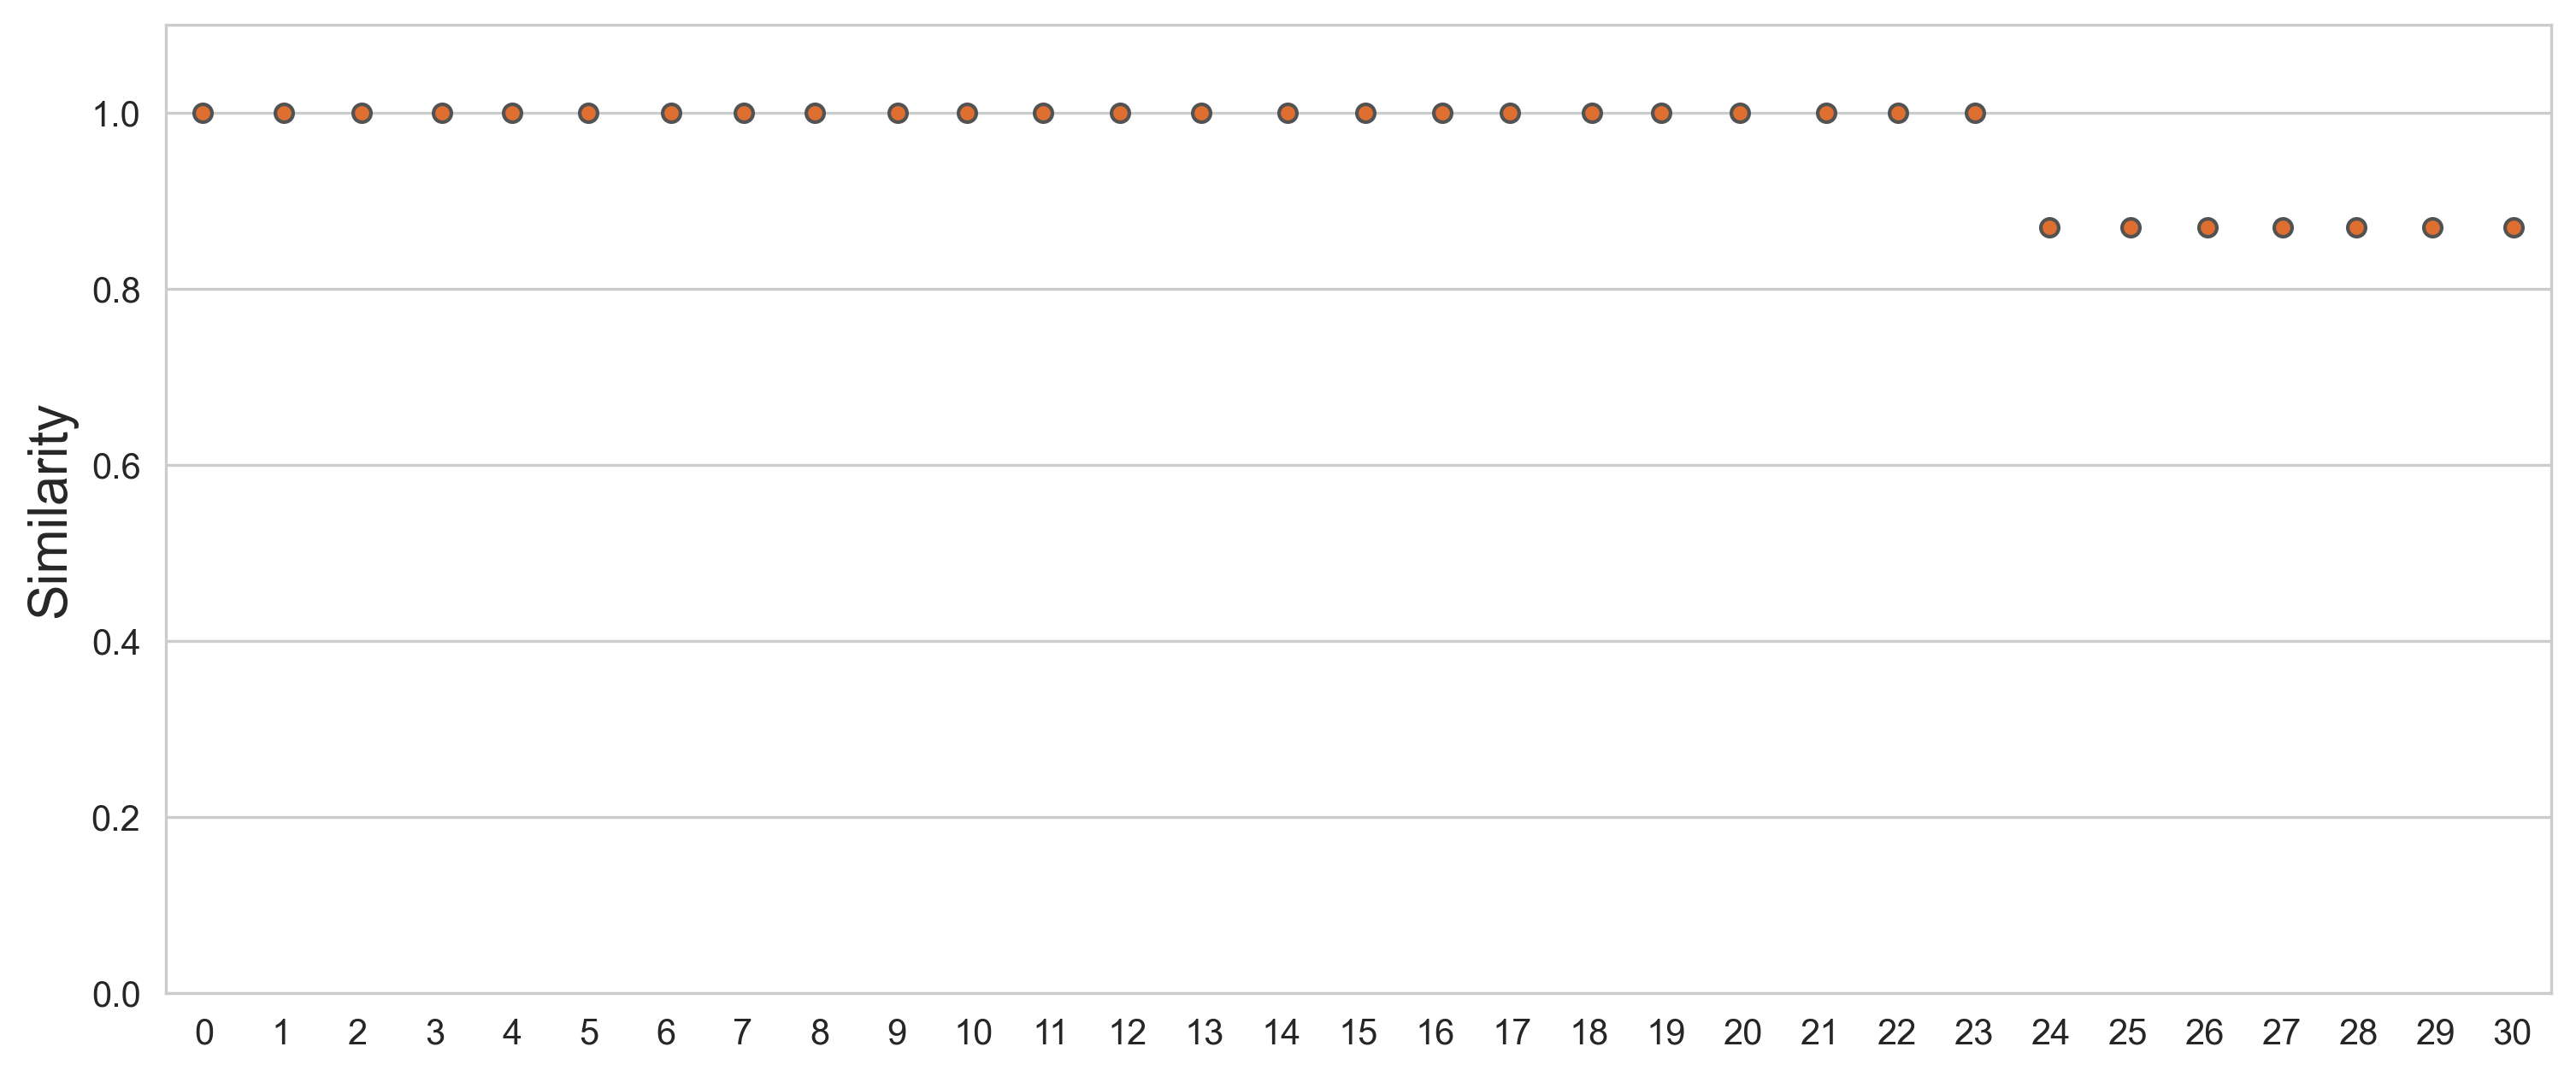

In [29]:
xData = [*range(len(seqSimilarityList))]
fig, ax = plt.subplots(figsize=(12, 5), dpi=300)
sns.set_style("whitegrid")
sns.stripplot(x=xData, y=seqSimilarityList, linewidth=1.0, color=colorA)
ax.set_ylabel("Similarity", size=15)
ax.set_ylim(0,1.1)

In [30]:
# # Test cutter A
# repeatPositionListA = seqA.getRepeatPositionList()
# dfamA = DfamEvaluation(repeatPositionListA)
# repeatPositionLookupDicA = dfamA.positionBucketClassifier()
# dfamPositionListA = dfamA.getDfamPositionList()
# dfamPositionLookupDicA = dfamA.positionBucketClassifier()
# DRrepeatMatchListA, DRmatchedFamilyAccListA, DRmatchedFamilyNameListA = dfamA.checkDfamMatchWithRepeat()

In [31]:
# totalLen = len(DRrepeatMatchListA)
# matchLenA = len(list(filter(lambda x: x, DRrepeatMatchListA)))
# ratio = matchLenA / totalLen
# print(f"matchCount:{matchLenA}\tdfamCount:{totalLen}\tRatio:{ratio}")

In [32]:
# # Test cutter B
# repeatPositionListB = seqB.getRepeatPositionList()
# dfamB = DfamEvaluation(repeatPositionListB)
# repeatPositionLookupDicB = dfamB.positionBucketClassifier()
# dfamPositionListB = dfamB.getDfamPositionList()
# dfamPositionLookupDicB = dfamB.positionBucketClassifier()
# DRrepeatMatchListB, DRmatchedFamilyAccListB, DRmatchedFamilyNameListB = dfamB.checkDfamMatchWithRepeat()

In [33]:
# totalLen = len(DRrepeatMatchListB)
# matchLenB = len(list(filter(lambda x: x, DRrepeatMatchListB)))
# ratio = matchLenB / totalLen
# print(f"matchCount:{matchLenB}\tdfamCount:{totalLen}\tRatio:{ratio}")

In [34]:
# total = 597
# middle = matchLenA+matchLenB - total
# plt.figure(linewidth=10, facecolor="white", dpi=1200)
# # plt.figure(linewidth=10, facecolor="white")
# v = venn2(subsets = (matchLenA-middle, matchLenB-middle, middle), set_labels = (f'CutterA - {cutterA} ', f'CutterB - {cutterB}'), set_colors=(colorA, colorB))
# plt.show()
